In [79]:
# Importing the required libraries
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data Handling Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Set default figure style
sns.set(style='whitegrid')

# For data preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc)
# for saving models
import joblib 

In [81]:
# Data loading
df=pd.read_csv("dataset.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [83]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [85]:
# checking missing values
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [87]:
# checking duplicated column
df.duplicated().sum()

0

In [89]:
# deleting unnecessary columns
df=df.drop(columns=['ID','No_Pation'],axis=1)
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


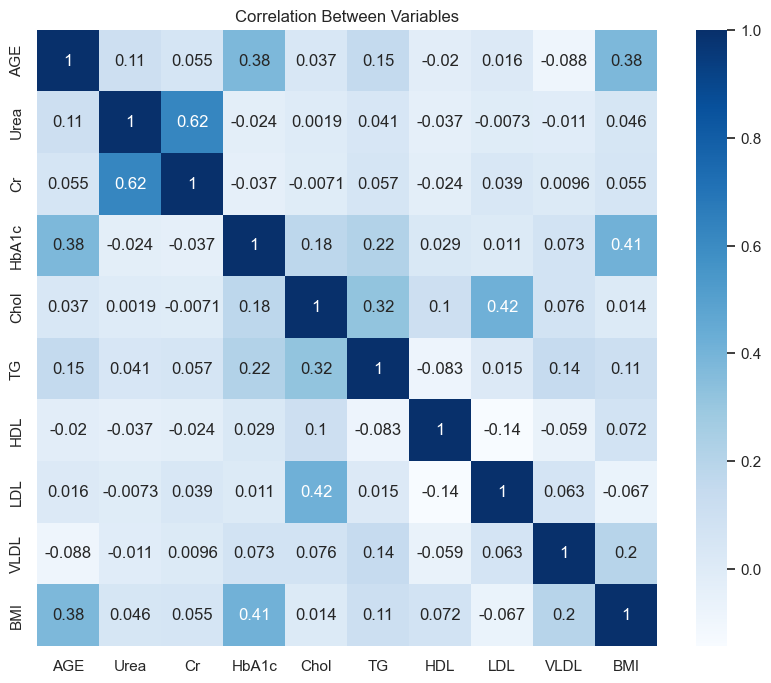

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='Blues')
plt.title("Correlation Between Variables")
plt.show()

In [93]:
df["CLASS"].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [95]:
df["CLASS"]=df["CLASS"].str.strip().str.upper()
df["CLASS"].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [97]:
df['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [99]:
df["Gender"]=df["Gender"].str.strip().str.upper()
df["Gender"].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [101]:
# 2. Label encode Gender
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# 3. Label encode target CLASS
le_class = LabelEncoder()
df['CLASS'] = le_class.fit_transform(df['CLASS'])

df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [103]:
# 4. Split features and target
X = df.drop('CLASS', axis=1)
y = df['CLASS']
print(X.head())
print(y[0:5])

   Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int32


In [105]:
# 5. Train-test split stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 11), (200, 11), (800,), (200,))

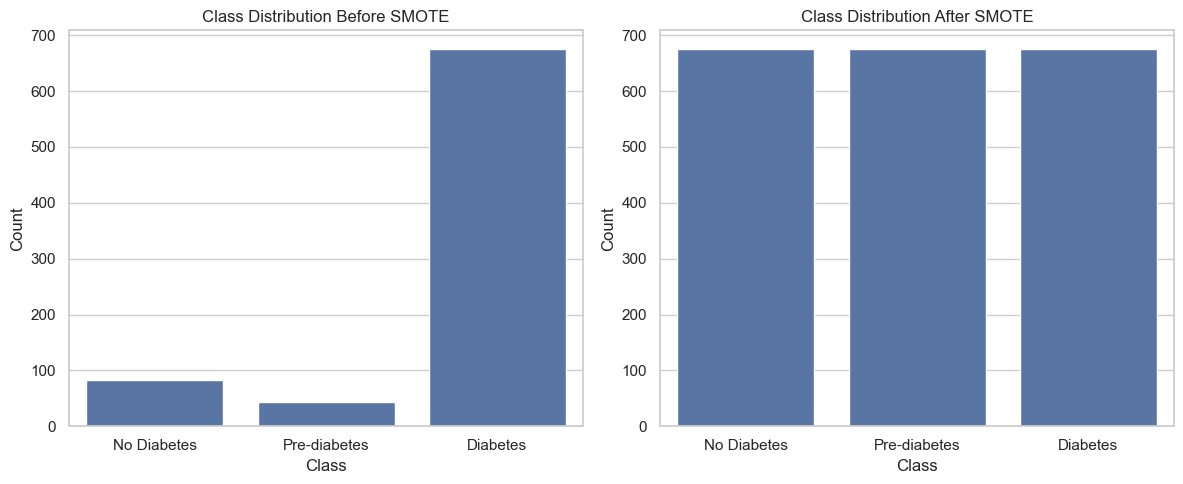

In [107]:
label_full_names = {'Y': 'Diabetes', 'N': 'No Diabetes', 'P': 'Pre-diabetes'}

# Map le_class.classes_ (e.g. ['N','P','Y']) to full labels in the same order
xtick_labels = [label_full_names[label] for label in le_class.classes_]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE distribution
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xticklabels(xtick_labels)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# After SMOTE distribution
sns.countplot(x=y_train_smote, ax=axes[1])
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xticklabels(xtick_labels)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [109]:
# 6. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
print("Sample of Scaled Training Data",X_train_scaled[0:5])
print("Sample of Scaled Testing Data",X_test_scaled[0:5])

Sample of Scaled Training Data [[-0.85139429  0.95039971 -1.03699449 -0.92464255  1.65608201  1.01257081
  -0.01405935 -0.21040014 -0.81208321 -0.16906072  0.27366726]
 [ 1.17454394 -1.81293941  0.06241165  0.37499804 -0.43305753  0.75440804
  -0.18461025 -0.0194793   1.03701905 -0.21045644 -0.16223803]
 [ 1.17454394  1.69437562  0.1063879   0.0388841   0.58928735 -0.88062283
  -0.78153841 -0.40132098 -0.48577105 -0.33464357  1.58138313]
 [ 1.17454394  2.11950472  1.38169902  0.80074237  0.27813891 -1.65511113
  -0.86681386 -0.78316266 -1.24716609 -0.33464357  0.84688272]
 [ 1.17454394  1.3755288   1.24977028  0.44222083  0.5003878  -0.02008027
   2.20310238 -1.16500433  0.16685328  0.03791783  1.58138313]]
Sample of Scaled Testing Data [[ 1.17454394  0.31270607 -0.15746958 -0.09556148 -0.16635886 -0.5364058
   0.83869516 -0.40132098 -0.81208321 -0.00347788 -0.38019067]
 [-0.85139429  1.3755288   1.24977028  0.15092208 -2.47774729 -1.05273134
   2.80003053 -0.21040014  1.14578977 -0.21

In [111]:
# 7. Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42)
}

# Label full names mapping for confusion matrix display
label_full_names = {'Y': 'Diabetes', 'N': 'No Diabetes', 'P': 'Pre-diabetes'}
class_order = le_class.classes_  # e.g. ['N', 'P', 'Y']
cm_labels = [label_full_names[label] for label in class_order]

# Map encoded classes to full descriptive labels for confusion matrix display
label_full_names = {'Y': 'Diabetes', 'N': 'No Diabetes', 'P': 'Pre-diabetes'}
class_order = le_class.classes_  # e.g. ['N', 'P', 'Y']
cm_labels = [label_full_names[label] for label in class_order]

# Binarize test labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=range(len(class_order)))
n_classes = y_test_bin.shape[1]

results = []

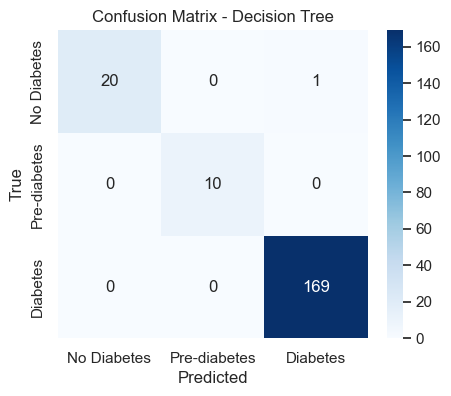

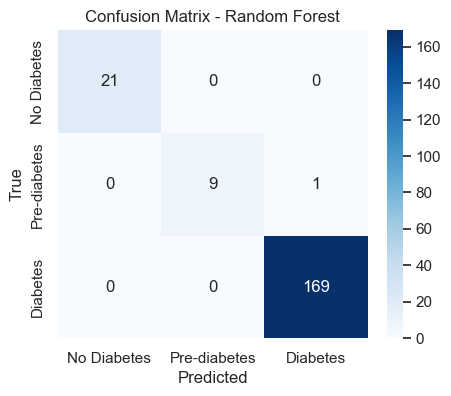

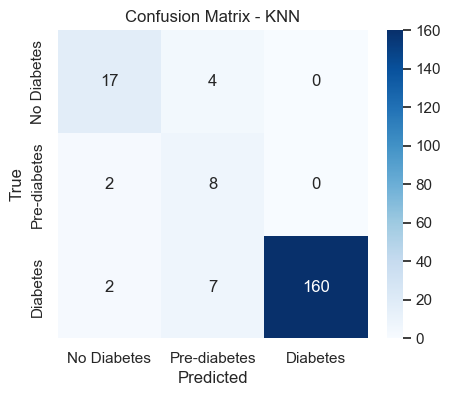

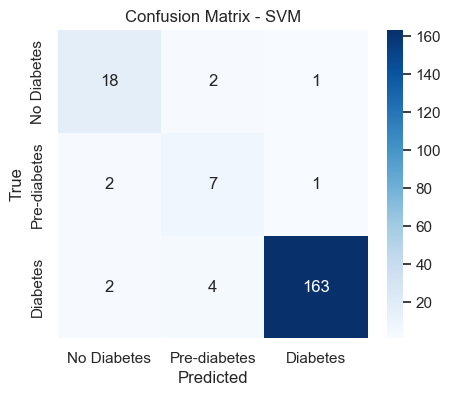

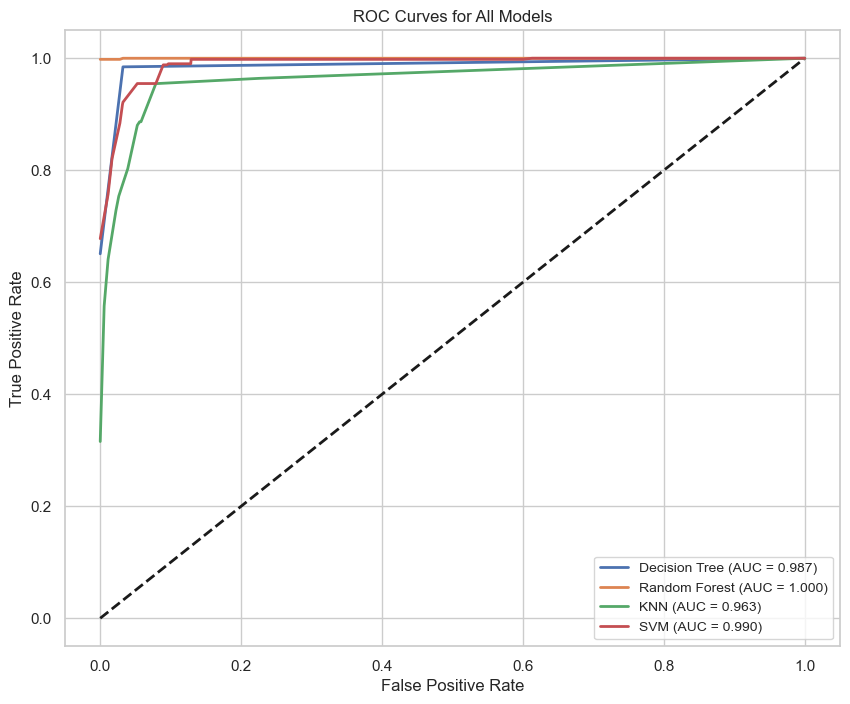

In [113]:
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train_smote)

    # Predict and predict probabilities
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_score = roc_auc_score(y_test_bin, y_prob, average='weighted', multi_class='ovr')  # renamed variable

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC-ROC': auc_score
    })

    # Confusion matrix plot with descriptive class labels
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=cm_labels,
                yticklabels=cm_labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Save model to disk
    joblib.dump(model, f'{name.replace(" ", "_").lower()}_model.joblib')


plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal baseline

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])

    # Aggregate all FPR points
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average it for macro-average ROC curve
    mean_tpr /= n_classes

    # Compute macro-average AUC using the sklearn.metrics auc() function
    macro_auc = auc(all_fpr, mean_tpr)

    # Plot macro-average ROC curve with AUC in the label
    plt.plot(all_fpr, mean_tpr, lw=2, label=f'{name} (AUC = {macro_auc:.3f})')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.show()

In [115]:
# Show results table sorted by accuracy
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Decision Tree,0.995,0.995029,0.995,0.994946,0.983871
1,Random Forest,0.995,0.995029,0.995,0.994876,0.999839
3,SVM,0.940,0.947590,0.940,0.943102,0.991563
2,KNN,0.925,0.951053,0.925,0.934471,0.974911


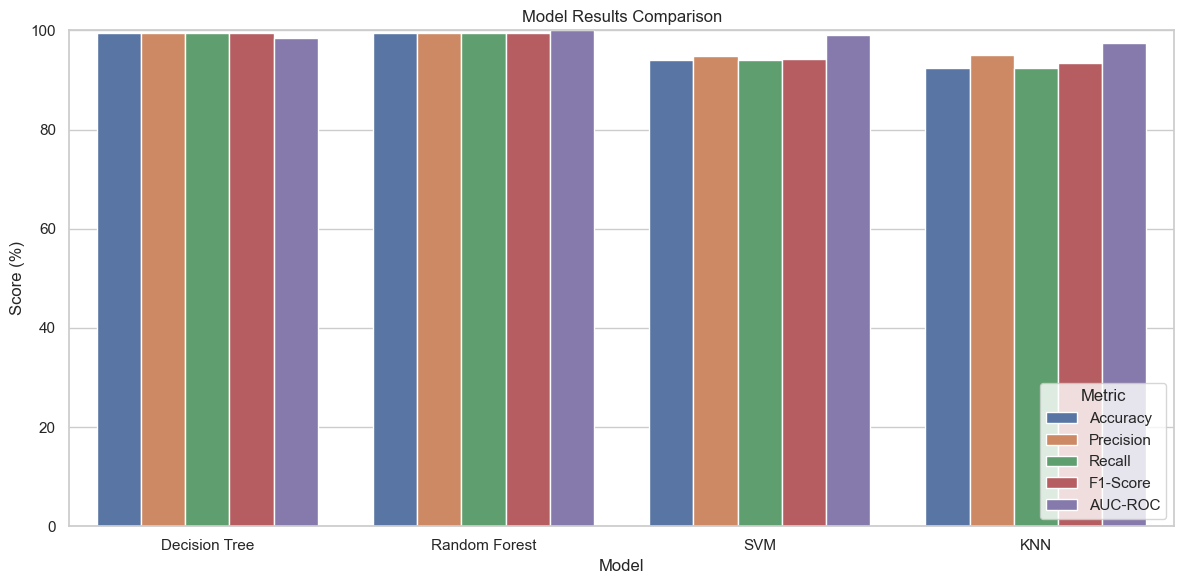

In [121]:
# Convert your DataFrame from wide to long format
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# Multiply by 100 for percentage display
df_percent = results_df.copy()
df_percent[metrics_to_plot] = df_percent[metrics_to_plot] * 100

# Melt the DataFrame to long format for seaborn
df_melted = df_percent.melt(id_vars='Model', value_vars=metrics_to_plot, var_name='Metric', value_name='Score (%)')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score (%)', hue='Metric')
plt.title('Model Results Comparison')
plt.ylim(0, 100)
#plt.xticks(rotation=180)
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()
plt.show()